Importing Packages

In [30]:
import pandas as pd #dataset
import numpy as np # matematis
import matplotlib.pyplot as plt #visual
import seaborn as sns #visual
from sklearn.datasets import make_blobs #visual
from matplotlib.colors import ListedColormap #visual
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.linear_model import SGDClassifier, LogisticRegression #modellogisticregression
from sklearn import neighbors #modelknn
from sklearn.naive_bayes import GaussianNB #modelnaivebayes
from sklearn.tree import DecisionTreeClassifier #modeldecisiontree
from sklearn.svm import SVC #modelSVM
from sklearn.neural_network import MLPClassifier #modelNeuralNetwork
from sklearn.metrics import classification_report #confusionmatrix
from sklearn import metrics #metrics

Data Preprocessing

In [3]:
#read data
from google.colab import drive
drive.mount('/content/drive') #connect to gdrive

df=pd.read_csv('/content/drive/MyDrive/Training/datasets/emails.csv') #read csv
df

Mounted at /content/drive


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [4]:
df.describe() #describing statistics of data

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [5]:
df.isnull().any().any() #checking for missing data

False

In [7]:
email = df.drop(['Email No.', 'Prediction'], axis = 'columns') #X
spam = df['Prediction'] #Y

In [11]:
spam_count=df['Prediction'].value_counts()
spam_count

0    3672
1    1500
Name: Prediction, dtype: int64

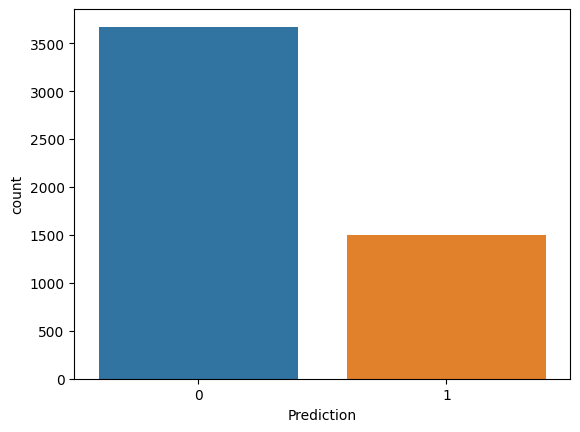

In [12]:
sns.countplot(data=df, x='Prediction')
plt.show()

In [14]:
#Splitting dataset to train and test
email_train, email_test, spam_train, spam_test = train_test_split(email, spam, test_size=1/3, random_state=17, stratify=spam)


In [17]:
email_train.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
4365,31,25,13,22,5,22,194,6,2,48,...,0,0,0,0,1,0,0,0,2,0
1389,1,0,1,0,0,2,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3568,0,0,1,0,1,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
752,3,2,1,0,1,0,30,2,0,8,...,0,0,0,0,0,0,0,0,0,0
517,15,7,1,5,4,2,43,3,0,6,...,0,0,0,0,0,0,0,0,0,0


In [18]:
email_test.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
3741,0,0,1,0,1,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3514,5,2,2,3,2,1,40,5,1,10,...,0,0,0,0,0,0,0,0,0,0
656,11,9,1,11,1,2,198,6,0,36,...,0,0,0,0,0,0,0,0,2,0
1273,0,0,1,0,1,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3225,1,0,1,0,1,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
spam_train.head()

4365    1
1389    0
3568    0
752     0
517     0
Name: Prediction, dtype: int64

In [20]:
spam_test.head()

3741    0
3514    1
656     1
1273    0
3225    0
Name: Prediction, dtype: int64

Logistic Regression

In [21]:
model_LR = SGDClassifier(loss="log")
print(model_LR.get_params())

{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [23]:
model_LR.fit(email, spam) #train
Predict_Spam_LR = model_LR.predict(email_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [31]:
LR_cm = metrics.confusion_matrix(spam_test, Predict_Spam_LR) #confusionmatrix
LR_cm

array([[1151,   73],
       [  19,  481]])

Text(0.5, 23.52222222222222, 'Predicted label')

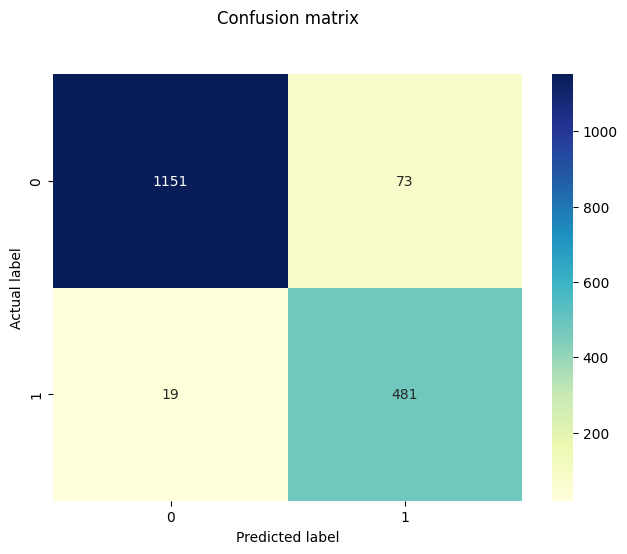

In [33]:
sns.heatmap(pd.DataFrame(LR_cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [27]:
LR = classification_report(spam_test, Predict_Spam_LR)
print(LR)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1224
           1       0.87      0.96      0.91       500

    accuracy                           0.95      1724
   macro avg       0.93      0.95      0.94      1724
weighted avg       0.95      0.95      0.95      1724



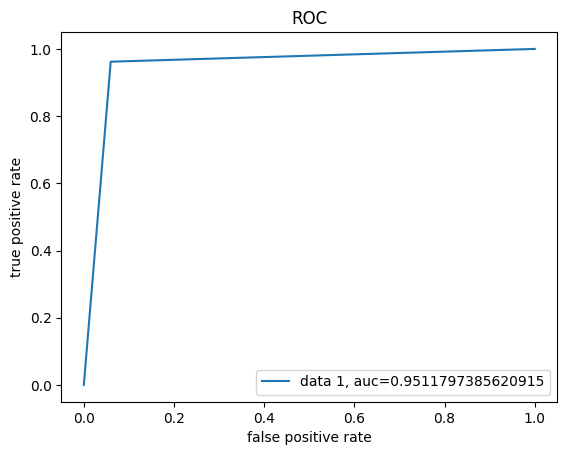

In [37]:
LR_fpr, LR_tpr, LR_ = metrics.roc_curve(spam_test, Predict_Spam_LR)
LR_auc = metrics.roc_auc_score(spam_test, Predict_Spam_LR)

plt.plot(LR_fpr, LR_tpr, label="data 1, auc="+str(LR_auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show()

K-Nearest Neighbour

In [38]:
n = 10
model_KNN = neighbors.KNeighborsClassifier(n, weights='uniform')
print(model_KNN.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}


In [39]:
model_KNN.fit(email, spam) #train
Predict_Spam_KNN = model_KNN.predict(email_test)

In [40]:
KNN_cm = metrics.confusion_matrix(spam_test, Predict_Spam_KNN) #confusionmatrix
KNN_cm

array([[1132,   92],
       [  72,  428]])

Text(0.5, 23.52222222222222, 'Predicted label')

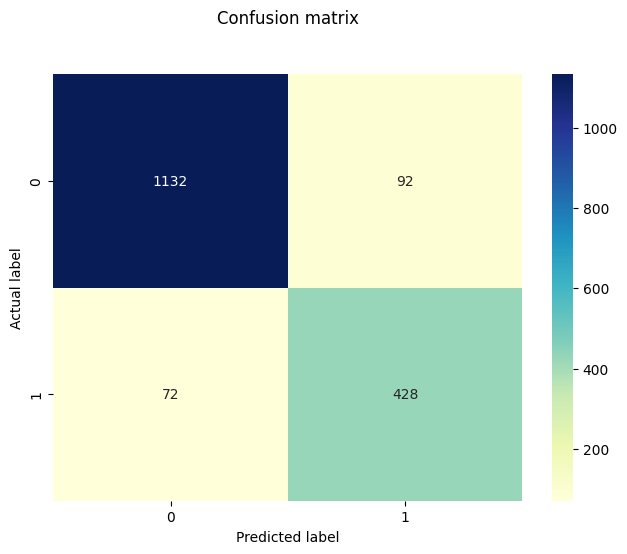

In [41]:
sns.heatmap(pd.DataFrame(KNN_cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [42]:
KNN = classification_report(spam_test, Predict_Spam_KNN)
print(KNN)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1224
           1       0.82      0.86      0.84       500

    accuracy                           0.90      1724
   macro avg       0.88      0.89      0.89      1724
weighted avg       0.91      0.90      0.91      1724



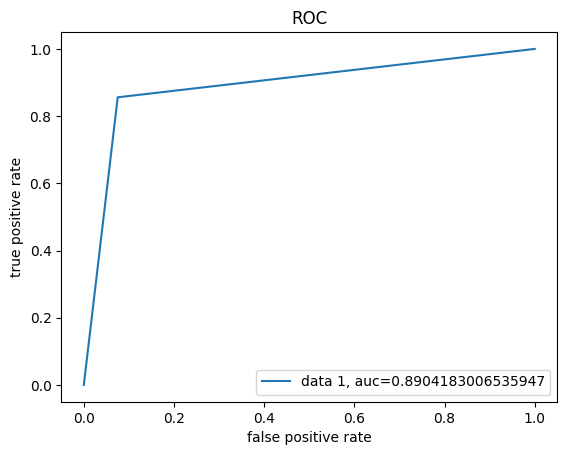

In [44]:
KNN_fpr, KNN_tpr, KNN_ = metrics.roc_curve(spam_test, Predict_Spam_KNN)
KNN_auc = metrics.roc_auc_score(spam_test, Predict_Spam_KNN)

plt.plot(KNN_fpr, KNN_tpr, label="data 1, auc="+str(KNN_auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show()

Decision Tree

In [45]:
model_DT = DecisionTreeClassifier()
print(model_DT.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [46]:
model_DT.fit(email, spam) #train
Predict_Spam_DT = model_DT.predict(email_test)

In [47]:
DT_cm = metrics.confusion_matrix(spam_test, Predict_Spam_DT) #confusionmatrix
DT_cm

array([[1224,    0],
       [   0,  500]])

Text(0.5, 23.52222222222222, 'Predicted label')

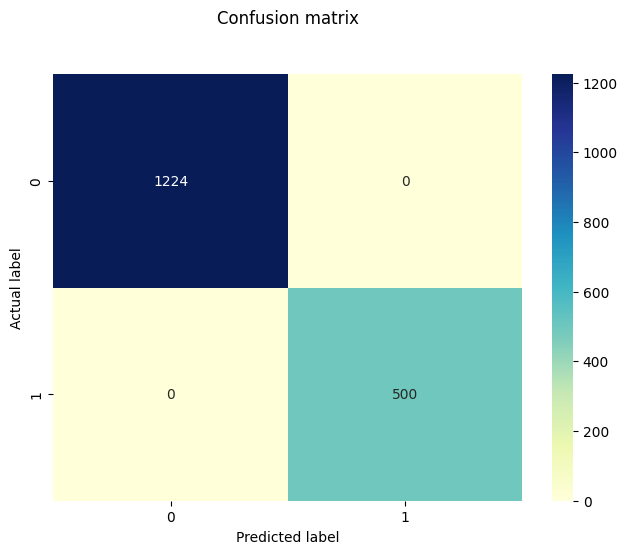

In [48]:
sns.heatmap(pd.DataFrame(DT_cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [49]:
DT = classification_report(spam_test, Predict_Spam_DT)
print(DT)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1224
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1724
   macro avg       1.00      1.00      1.00      1724
weighted avg       1.00      1.00      1.00      1724



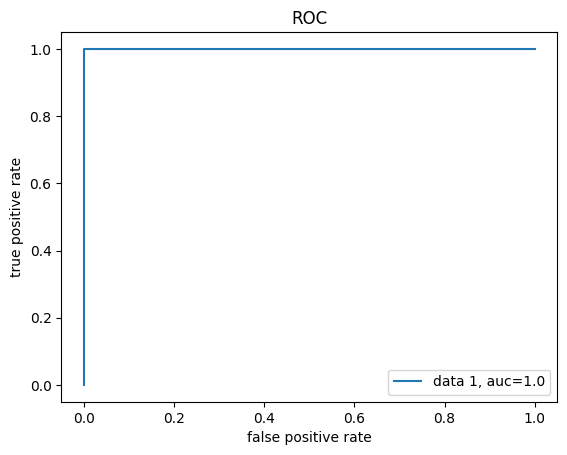

In [51]:
DT_fpr, DT_tpr, DT_ = metrics.roc_curve(spam_test, Predict_Spam_DT)
DT_auc = metrics.roc_auc_score(spam_test, Predict_Spam_DT)

plt.plot(DT_fpr, DT_tpr, label="data 1, auc="+str(DT_auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show()

Support Vector Machine

In [52]:
model_SVM = SVC(probability=True)
print(model_SVM.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [53]:
model_SVM.fit(email, spam) #train
Predict_Spam_SVM = model_SVM.predict(email_test)

In [54]:
SVM_cm = metrics.confusion_matrix(spam_test, Predict_Spam_SVM) #confusionmatrix
SVM_cm


array([[1204,   20],
       [ 278,  222]])

Text(0.5, 23.52222222222222, 'Predicted label')

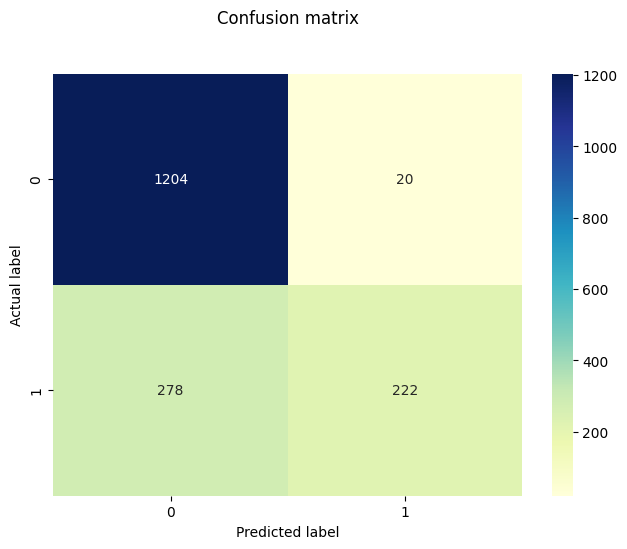

In [55]:
sns.heatmap(pd.DataFrame(SVM_cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [56]:
SVM = classification_report(spam_test, Predict_Spam_SVM)
print(SVM)

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1224
           1       0.92      0.44      0.60       500

    accuracy                           0.83      1724
   macro avg       0.86      0.71      0.74      1724
weighted avg       0.84      0.83      0.81      1724



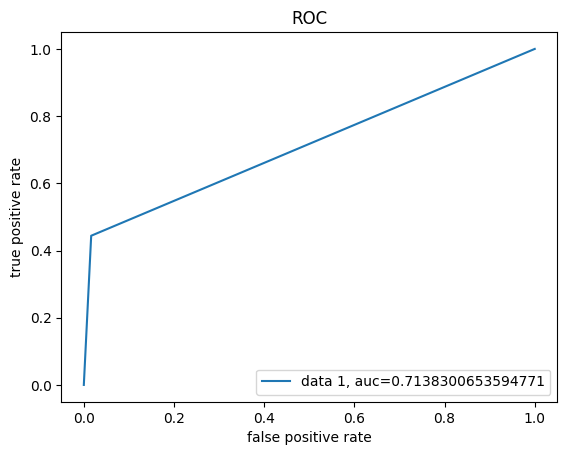

In [57]:
SVM_fpr, SVM_tpr, SVM_ = metrics.roc_curve(spam_test, Predict_Spam_SVM)
SVM_auc = metrics.roc_auc_score(spam_test, Predict_Spam_SVM)

plt.plot(SVM_fpr, SVM_tpr, label="data 1, auc="+str(SVM_auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show()

Naïve Bayes

In [58]:
model_NB = GaussianNB()
print(model_NB.get_params())

{'priors': None, 'var_smoothing': 1e-09}


In [59]:
model_NB.fit(email, spam) #train
Predict_Spam_NB = model_NB.predict(email_test)

In [60]:
NB_cm = metrics.confusion_matrix(spam_test, Predict_Spam_NB) #confusionmatrix
NB_cm

array([[1173,   51],
       [   4,  496]])

Text(0.5, 23.52222222222222, 'Predicted label')

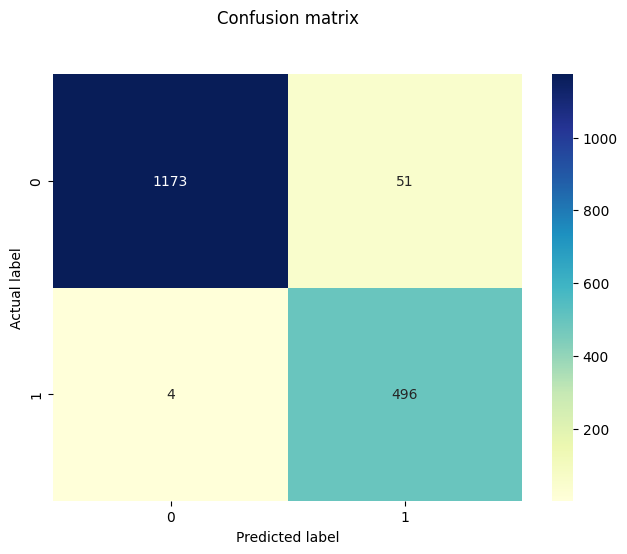

In [61]:
sns.heatmap(pd.DataFrame(NB_cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [62]:
NB = classification_report(spam_test, Predict_Spam_NB)
print(NB)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1224
           1       0.91      0.99      0.95       500

    accuracy                           0.97      1724
   macro avg       0.95      0.98      0.96      1724
weighted avg       0.97      0.97      0.97      1724



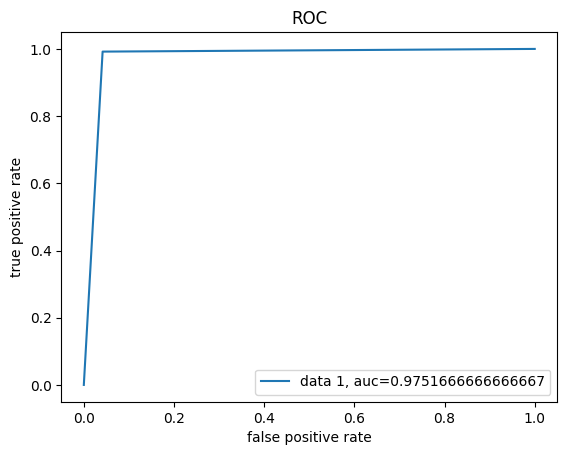

In [63]:
NB_fpr, NB_tpr, NB_ = metrics.roc_curve(spam_test, Predict_Spam_NB)
NB_auc = metrics.roc_auc_score(spam_test, Predict_Spam_NB)

plt.plot(NB_fpr, NB_tpr, label="data 1, auc="+str(NB_auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show()

Neural Network

In [64]:
model_NN = MLPClassifier(hidden_layer_sizes=(150,100,50),
                         max_iter = 100000,activation = 'relu',
                         solver = 'adam')
print(model_NN.get_params())

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 100000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [65]:
model_NN.fit(email, spam) #train
Predict_Spam_NN = model_NN.predict(email_test)

In [66]:
NN_cm = metrics.confusion_matrix(spam_test, Predict_Spam_NN) #confusionmatrix
NN_cm

array([[1224,    0],
       [   0,  500]])

Text(0.5, 23.52222222222222, 'Predicted label')

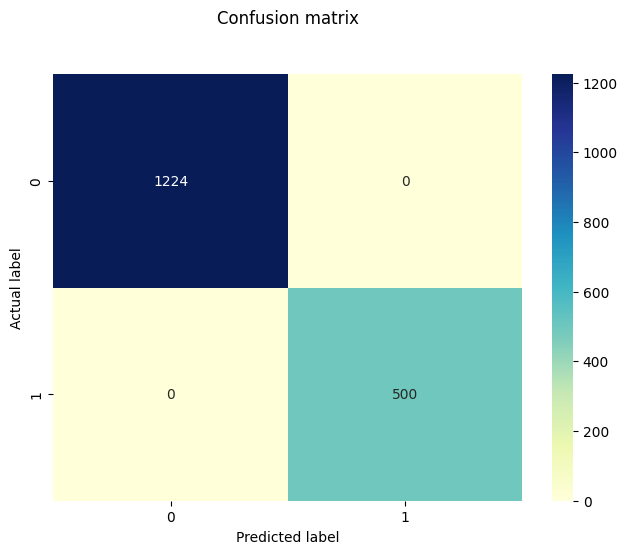

In [67]:
sns.heatmap(pd.DataFrame(NN_cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [68]:
NN = classification_report(spam_test, Predict_Spam_NN)
print(NN)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1224
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1724
   macro avg       1.00      1.00      1.00      1724
weighted avg       1.00      1.00      1.00      1724



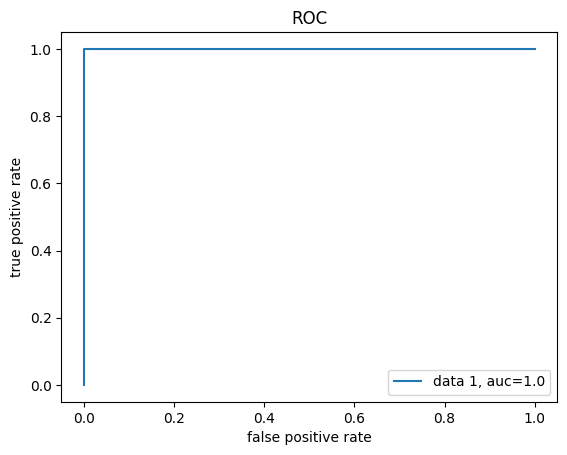

In [69]:
NN_fpr, NN_tpr, NN_ = metrics.roc_curve(spam_test, Predict_Spam_NN)
NN_auc = metrics.roc_auc_score(spam_test, Predict_Spam_NN)

plt.plot(NN_fpr, NN_tpr, label="data 1, auc="+str(NN_auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show()

Best Model

Dalam menentukan ukuran kebaikan model, seringkali parameter yang digunakan adalah dengan membandingkan nilai akurasi. Model dengan nilai akurasi tertinggi (mendekati 1) dinobatkan sebagai model terbaik. Namun, dalam kasus deteksi spam email ini, data yang dimiliki bersifat tidak seimbang, dengan kasus spam -yang justru ingin kita teliti- memiliki jumlah data yang lebih sedikit (29%) dibandingkan dengan data tidak spam. Maka dari itu, ukuran recall atau sensitivitas perlu diperhatikan, karena seringkali pada kasus data tidak seimbang, akurasi yang dihasilkan tinggi namun model kurang sensitif. Hal ini tentu saja disebabkan karena model cenderung mempelajari satu kondisi (data yang lebih banyak) dibandingkan kondisi lainnya. Selain itu nilai F1-Skor dan ROC pun dinilai lebih objektif untuk menentukan model terbaik dibandingkan dengan akurasi. Berikut rekapitulasi ukuran kebaikan tiap-tiap model:



1.   Logistic Regression
*   Accuracy: 95%
*   Recall: 95%
*   F1 Score: 94%
*   ROC: 95%

2.   K-Nearest Neighbour
*   Accuracy: 90%
*   Recall: 89%
*   F1 Score: 89%
*   ROC: 89%

3.   Decision Tree
*   Accuracy: 100%
*   Recall: 100%
*   F1 Score: 100%
*   ROC: 100%

4.   Support Vector Machine
*   Accuracy: 83%
*   Recall: 71%
*   F1 Score: 74%
*   ROC: 71%

5.   Naive Bayes
*   Accuracy: 97%
*   Recall: 98%
*   F1 Score: 96%
*   ROC: 97%

6.   Neural Network
*   Accuracy: 100%
*   Recall: 100%
*   F1 Score: 100%
*   ROC: 100%


Jika diurutkan berdasarkan model terbaik, maka Naive Bayes adalah model terbaik, diikuti Logistic Regression, K-Nearest Neighbour, dan terakhir Support Vector Machine. Model Decision Tree dan Neural Network tidak diperhitungkan karena nilai yang 'terlalu sempurna' cenderung berindikasi pada model yang *over-fitting*.


